In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!unzip '17810_23812_bundle_archive.zip' -d

error:  must specify directory to which to extract with -d option


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [4]:
import tensorflow as tf

In [6]:
print(tf.__version__)

2.2.0


In [7]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

### Group parameters for train and test data generators

In [8]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True, 
                                                             zoom_range=0.2,
                                                             rescale=1./225)
val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./225)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./225)
train_data = train_datagen.flow_from_directory('../data/chest_xray/train_2//',
                                               target_size=(100,100),
                                               batch_size=32,
                                               class_mode='binary',
                                               color_mode='grayscale')
val_data = val_datagen.flow_from_directory('../data/chest_xray/val/',
                                               target_size=(100,100),
                                               batch_size=32,
                                               class_mode='binary',
                                               color_mode='grayscale')
test_data = test_datagen.flow_from_directory('../data/chest_xray/test//',
                                             target_size=(100,100),
                                             batch_size=32,
                                             class_mode='binary',
                                             color_mode='grayscale')

Found 2568 images belonging to 2 classes.
Found 550 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [9]:
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]

In [11]:
model = Sequential()
model.add(Convolution2D(32, (3,3), input_shape=(100,100,1), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(units=85, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ])

In [34]:
history = model.fit(train_data, epochs=60, validation_data=(val_data), steps_per_epoch=len(train_data), validation_steps=len(val_data))

Epoch 1/60
81/81 [==============================] - 75s 924ms/step - loss: 0.1355 - accuracy: 0.9451 - precision: 0.9553 - recall: 0.9467 - val_loss: 0.0998 - val_accuracy: 0.9636 - val_precision: 1.0000 - val_recall: 0.9410
Epoch 2/60
81/81 [==============================] - 73s 898ms/step - loss: 0.1530 - accuracy: 0.9408 - precision: 0.9476 - recall: 0.9463 - val_loss: 0.2114 - val_accuracy: 0.9291 - val_precision: 1.0000 - val_recall: 0.8870
Epoch 3/60
81/81 [==============================] - 67s 831ms/step - loss: 0.1378 - accuracy: 0.9482 - precision: 0.9563 - recall: 0.9503 - val_loss: 0.2054 - val_accuracy: 0.9255 - val_precision: 1.0000 - val_recall: 0.8783
Epoch 4/60
81/81 [==============================] - 74s 914ms/step - loss: 0.1263 - accuracy: 0.9548 - precision: 0.9630 - recall: 0.9563 - val_loss: 0.1812 - val_accuracy: 0.9455 - val_precision: 1.0000 - val_recall: 0.9120
Epoch 5/60
81/81 [==============================] - 64s 794ms/step - loss: 0.1386 - accuracy: 0.9482

KeyboardInterrupt: 

In [13]:
acc = model.evaluate_generator(test_data, steps=len(test_data), verbose=1)
list(zip(model.metrics_names, acc))

Instructions for updating:
Please use Model.evaluate, which supports generators.
20/20 [==============================] - 14s 693ms/step - loss: 0.5327 - accuracy: 0.8734 - precision: 0.8575 - recall: 0.9564


[('loss', 0.5326526761054993),
 ('accuracy', 0.8733974099159241),
 ('precision', 0.8574712872505188),
 ('recall', 0.9564102292060852)]

In [72]:
type(test_data)

keras.preprocessing.image.DirectoryIterator

In [15]:
first_batch = test_data.next()
data_list = first_batch[0]
batch_index = 0
class_list = first_batch[1]
while batch_index <= test_data.batch_index:
    data = test_data.next()
    print(data[0].shape)
    data_list=np.concatenate((data_list, data[0]))
    class_list=np.concatenate((class_list, data[1]))
    batch_index = batch_index + 1
data_array = np.asarray(data_list)
data_array.shape

(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(16, 100, 100, 1)


(624, 100, 100, 1)

In [22]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, roc_curve, auc, classification_report, confusion_matrix
def evaluation(y, y_hat, title = 'Confusion Matrix'):
    '''takes in true values and predicted values.
    The function then prints out a classifcation report
    as well as a confusion matrix using seaborn's heatmap.'''
    cm = confusion_matrix(y, y_hat)
    precision = precision_score(y, y_hat)
    recall = recall_score(y, y_hat)
    accuracy = accuracy_score(y,y_hat)
    print(classification_report(y, y_hat, target_names=['NORMAL', 'PNEUMONIA']))
    print('Accurancy: ', accuracy)
    sns.heatmap(cm,  cmap= 'Greens', annot=True)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.title(title)
    plt.show()

In [23]:
preds = model.predict_classes(data_array)

              precision    recall  f1-score   support

      NORMAL       0.91      0.74      0.81       234
   PNEUMONIA       0.86      0.96      0.90       390

    accuracy                           0.87       624
   macro avg       0.88      0.85      0.86       624
weighted avg       0.88      0.87      0.87       624

Accurancy:  0.8733974358974359


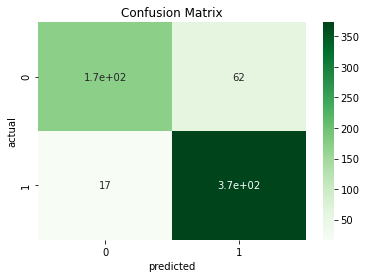

In [24]:
evaluation(class_list, preds)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
plt.style.use('fivethirtyeight')

In [28]:
accuracy = history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

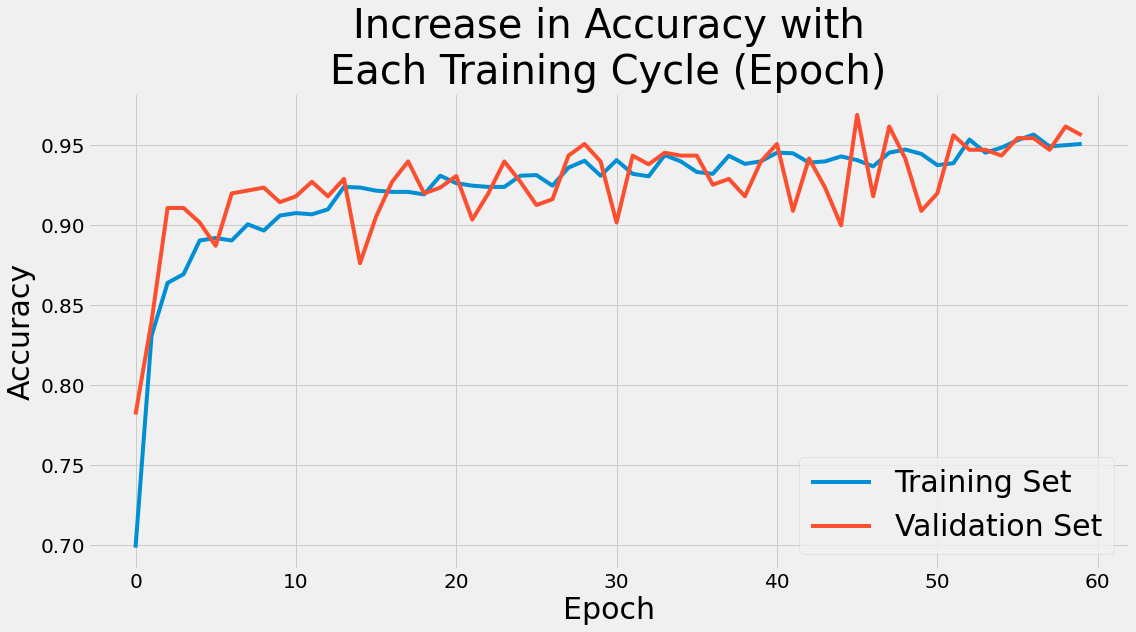

In [29]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

sns.lineplot(range(len(accuracy)), accuracy, ax=ax, label='Training Set')
# sns.lineplot(range(len(loss)), loss, ax=ax[1])

sns.lineplot(range(len(val_accuracy)), val_accuracy, ax=ax, label='Validation Set')
# sns.lineplot(range(len(val_loss)), val_loss, ax=ax[1])

ax.set_title("Increase in Accuracy with\nEach Training Cycle (Epoch)", fontsize=40)
ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('Epoch', fontsize=30)
ax.tick_params(labelsize='20')
ax.legend(loc='lower right', fontsize=30)
plt.tight_layout()

plt.savefig('accuracy_with_val.png', transparency=True)

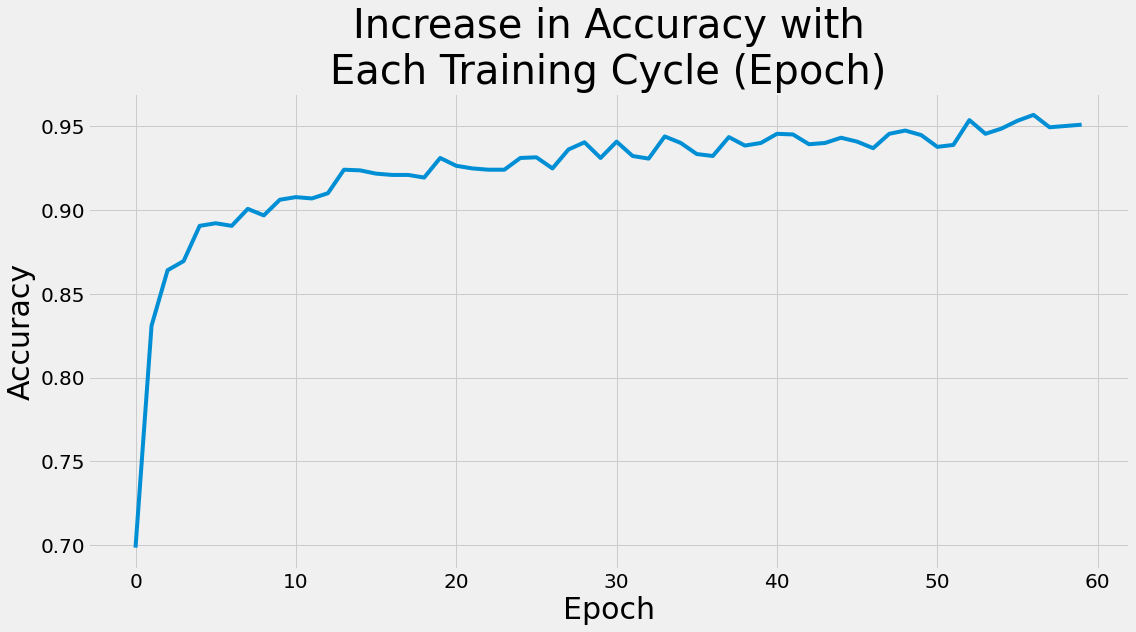

In [30]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

sns.lineplot(range(len(accuracy)), accuracy, ax=ax)
# sns.lineplot(range(len(loss)), loss, ax=ax[1])

# sns.lineplot(range(len(val_accuracy)), val_accuracy, ax=ax, label='Validation Set')
# sns.lineplot(range(len(val_loss)), val_loss, ax=ax[1])

ax.set_title("Increase in Accuracy with\nEach Training Cycle (Epoch)", fontsize=40)
ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('Epoch', fontsize=30)
ax.tick_params(labelsize='20')
# ax.legend(loc='lower right', fontsize=30)
plt.tight_layout()

plt.savefig('accuracy.png', transparency=True)

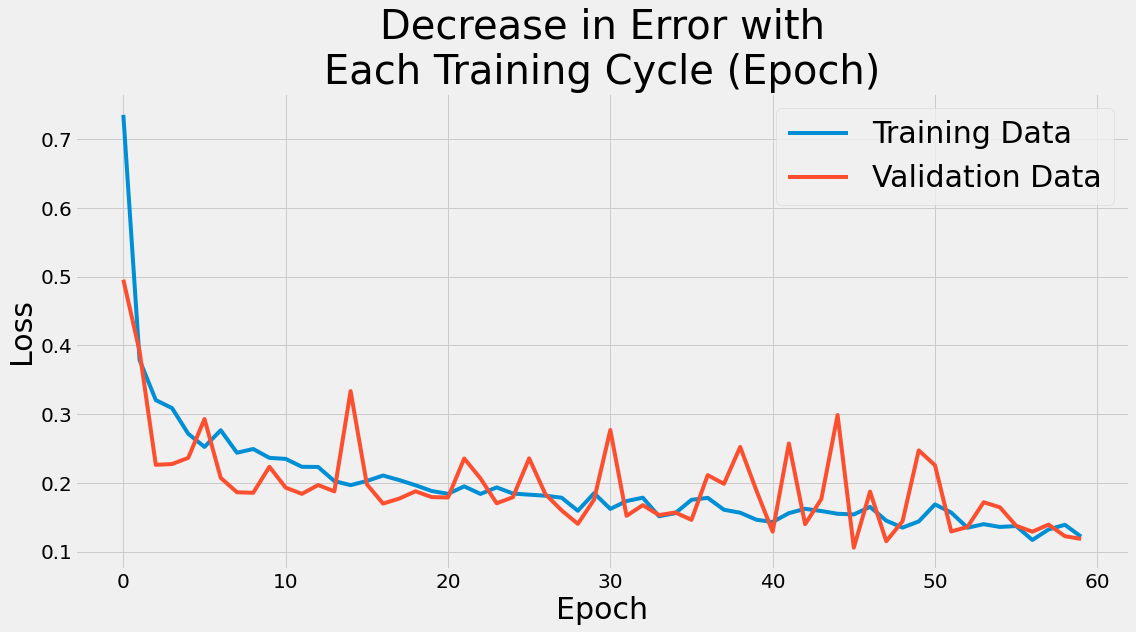

In [31]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

# sns.lineplot(range(len(accuracy)), accuracy, ax=ax)
sns.lineplot(range(len(loss)), loss, ax=ax, label='Training Data')

# sns.lineplot(range(len(val_accuracy)), val_accuracy, ax=ax, label='Validation Set')
sns.lineplot(range(len(val_loss)), val_loss, ax=ax, label='Validation Data')

ax.set_title("Decrease in Error with\nEach Training Cycle (Epoch)", fontsize=40)
ax.set_ylabel('Loss', fontsize=30)
ax.set_xlabel('Epoch', fontsize=30)
ax.tick_params(labelsize='20')
ax.legend(loc='upper right', fontsize=30)
plt.tight_layout()

plt.savefig('loss_with_val.png', transparency=True)

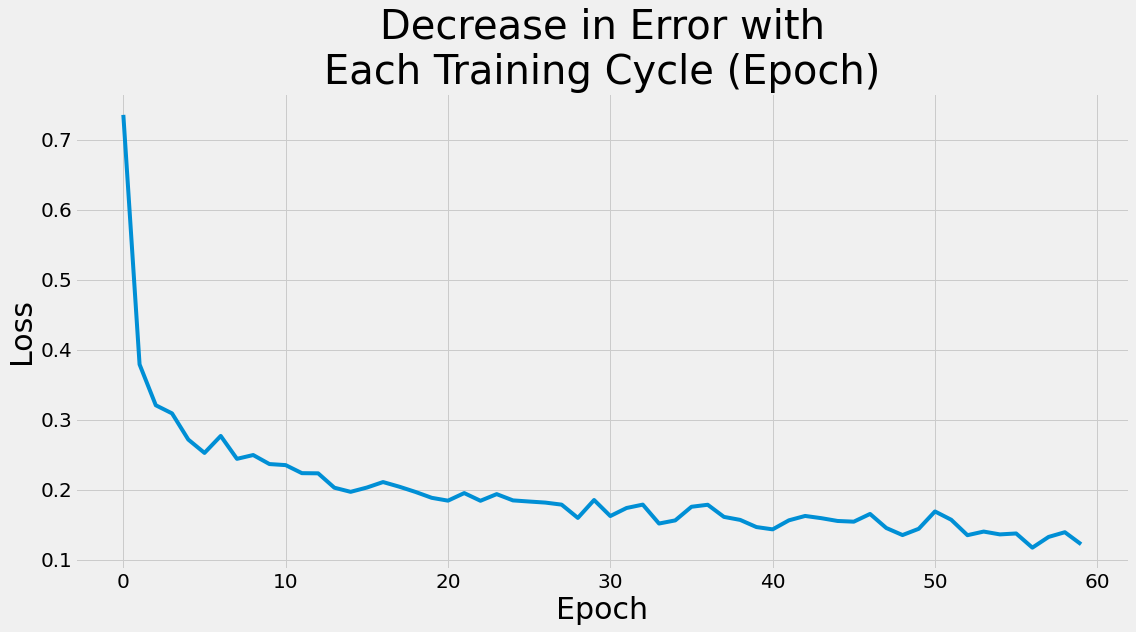

In [32]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

# sns.lineplot(range(len(accuracy)), accuracy, ax=ax)
sns.lineplot(range(len(loss)), loss, ax=ax)

# sns.lineplot(range(len(val_accuracy)), val_accuracy, ax=ax, label='Validation Set')
# sns.lineplot(range(len(val_loss)), val_loss, ax=ax, label='Validation Data')

ax.set_title("Decrease in Error with\nEach Training Cycle (Epoch)", fontsize=40)
ax.set_ylabel('Loss', fontsize=30)
ax.set_xlabel('Epoch', fontsize=30)
ax.tick_params(labelsize='20')
# ax.legend(loc='upper right', fontsize=30)
plt.tight_layout()

plt.savefig('loss.png', transparency=True)